In [1]:
import os
import json
import pprint
import re
import pickle
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import json

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_json_files_from_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                data.append(json.load(file))
    return data

In [5]:
folder_data = "/content/drive/MyDrive/NLP Indonesia AI/Project - 2/liputan6_data"
dataset_type = "canonical"

train_dir = os.path.join(folder_data, dataset_type, "train")
valid_dir = os.path.join(folder_data, dataset_type, "dev")
test_dir = os.path.join(folder_data, dataset_type, "test")

In [6]:
train_dir

'/content/drive/MyDrive/NLP Indonesia AI/Project - 2/liputan6_data/canonical/train'

In [7]:
valid_dir

'/content/drive/MyDrive/NLP Indonesia AI/Project - 2/liputan6_data/canonical/dev'

In [8]:
test_dir

'/content/drive/MyDrive/NLP Indonesia AI/Project - 2/liputan6_data/canonical/test'

In [9]:
train_data = load_json_files_from_directory(train_dir)
valid_data = load_json_files_from_directory(valid_dir)
test_data = load_json_files_from_directory(test_dir)

In [10]:
train_data[0]

{'id': 91767,
 'url': 'https://www.liputan6.com/news/read/91767/hujan-debu-di-soputan--warga-belum-mengungsi',
 'clean_article': [['Liputan6',
   '.',
   'com',
   ',',
   'Minahasa',
   'Selatan',
   ':',
   'Gunung',
   'Berapi',
   'Soputan',
   'di',
   'Minahasa',
   'Selatan',
   ',',
   'Sulawesi',
   'Utara',
   ',',
   'mulai',
   'bergemuruh',
   'sejak',
   'Sabtu',
   'malam',
   '.'],
  ['Hingga',
   'Senin',
   '(',
   '13/12',
   ')',
   ',',
   'asap',
   'debu',
   'yang',
   'mengepul',
   'dari',
   'Gunung',
   'Soputan',
   'setinggi',
   'satu',
   'kilometer',
   '.'],
  ['Angin',
   'yang',
   'berembus',
   'ke',
   'arah',
   'utara',
   'menyebabkan',
   'sebagian',
   'wilayah',
   'Tombatu',
   ',',
   'Langowan',
   ',',
   'dan',
   'Tondano',
   'ditudungi',
   'hujan',
   'debu',
   '.'],
  ['Kondisi',
   'ini',
   'membuat',
   'pemantau',
   'gunung',
   'menetapkan',
   'status',
   'siaga',
   'satu',
   '.'],
  ['Meski',
   'sudah',
   'ditetapkan'

In [11]:
valid_data[0]

{'id': 10735,
 'url': 'https://www.liputan6.com/news/read/10735/kepolisian-mengusut-insiden-penyerbuan-pos-brimob',
 'clean_article': [['Liputan6',
   '.',
   'com',
   ',',
   'Palu',
   ':',
   'Kasus',
   'penyerbuan',
   'pos',
   'penjagaan',
   'pasukan',
   'Brigade',
   'Mobil',
   'di',
   'Kelurahan',
   'Sayo',
   ',',
   'Kecamatan',
   'Poso',
   'Kota',
   ',',
   'Sulawesi',
   'Tengah',
   ',',
   'oleh',
   'sekelompok',
   'massa',
   'masih',
   'gelap',
   '.'],
  ['Sebab',
   ',',
   'Kepolisian',
   'setempat',
   'masih',
   'belum',
   'bisa',
   'memastikan',
   'penyebab',
   'kasus',
   'penyerbuan',
   'berdarah',
   'itu',
   '.'],
  ['Bahkan',
   ',',
   'hingga',
   'saat',
   'ini',
   'Kepolisian',
   'Daerah',
   'Sulteng',
   'masih',
   'terus',
   'mengejar',
   'para',
   'pelaku',
   'penyerbuan',
   'yang',
   'diperkirakan',
   'berjumlah',
   '30',
   'orang',
   '.'],
  ['Penegasan',
   'hal',
   'tersebut',
   'diungkapkan',
   'Wakil',
   'K

In [12]:
test_data[0]

{'id': 25654,
 'url': 'https://www.liputan6.com/news/read/25654/menuntaskan-konflik-poso-di-malino',
 'clean_article': [['Liputan6',
   '.',
   'com',
   ',',
   'Makassar',
   ':',
   'Menteri',
   'Koordinator',
   'Kesejahteraan',
   'Rakyat',
   'Jusuf',
   'Kalla',
   'dan',
   'rombongan',
   'dari',
   'Kantor',
   'Menko',
   'Bidang',
   'Politik',
   'dan',
   'Keamanan',
   ',',
   'Majelis',
   'Ulama',
   'Indonesia',
   'serta',
   'Dewan',
   'Gereja',
   'Indonesia',
   'bertemu',
   'dengan',
   'Gubernur',
   'Sulawesi',
   'Selatan',
   'H',
   '.',
   'Z',
   '.',
   'B',
   'Palaguna',
   'di',
   'Makassar',
   ',',
   'Sulsel',
   ',',
   'Selasa',
   '(',
   '18/12',
   ')',
   '.'],
  ['Mereka',
   'membicarakan',
   'sejumlah',
   'agenda',
   'yang',
   'akan',
   'dibawa',
   'ke',
   'Pertemuan',
   'Malino',
   ',',
   'Sulsel',
   ',',
   'antara',
   'dua',
   'kelompok',
   'agama',
   'yang',
   'bertikai',
   'di',
   'Poso',
   ',',
   'Sulawesi',
  

## JSON to Dataframe

In [13]:
train_set = pd.json_normalize(train_data)
valid_set = pd.json_normalize(valid_data)
test_set = pd.json_normalize(test_data)

In [14]:
train_set

,id,url,clean_article,clean_summary,extractive_summary
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]"
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]"
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]"
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]"
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]"
...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]"
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]"
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]"
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]"


In [15]:
valid_set

,id,url,clean_article,clean_summary,extractive_summary
0,10735,https://www.liputan6.com/news/read/10735/kepol...,"[[Liputan6, ., com, ,, Palu, :, Kasus, penyerb...","[[Polda, Sulteng, masih, belum, bisa, memastik...","[1, 6]"
1,10899,https://www.liputan6.com/news/read/10899/digel...,"[[Liputan6, ., com, ,, Jakarta, :, Konflik, be...","[[Konflik, berkepanjangan, di, Aceh, menyebabk...","[0, 3, 2]"
2,7515,https://www.liputan6.com/news/read/7515/imf-me...,"[[Liputan6, ., com, ,, Jakarta, :, Dana, Monet...","[[IMF, mendesak, pemerintah, Indonesia, untuk,...","[0, 5]"
3,10134,https://www.liputan6.com/news/read/10134/nasib...,"[[Liputan6, ., com, ,, Lampung, :, Ribuan, peg...","[[Ribuan, PNS, bekas, kanwil, instansi, yang, ...","[0, 7]"
4,8126,https://www.liputan6.com/news/read/8126/kapolr...,"[[Liputan6, ., com, ,, Jakarta, :, Polri, belu...","[[Polri, belum, mau, menyelidiki, kasus, pengg...","[0, 1]"
...,...,...,...,...,...
10977,1139,https://www.liputan6.com/news/read/1139/status...,"[[Liputan6, ., com, ,, Jakarta, :, Status, Gub...","[[Status, Syahril, dialihkan, menjadi, tahanan...","[2, 7]"
10978,6367,https://www.liputan6.com/news/read/6367/sejara...,"[[Liputan6, ., com, ,, Jakarta, :, Pelaku, sej...","[[Memperdebatkan, sosok, yang, memberikan, kom...","[0, 1]"
10979,3086,https://www.liputan6.com/news/read/3086/wanita...,"[[Liputan6, ., com, ,, Pekanbaru, :, Polisi, k...","[[Seorang, wanita, muda, yang, tengah, hamil, ...","[1, 6]"
10980,470,https://www.liputan6.com/news/read/470/mengena...,"[[Liputan6, ., Com, ,, Jakarta, :, Usai, mempe...","[[Massa, Front, Hizbullah, turun, ke, jalan, ....","[12, 13]"


In [16]:
test_set

,id,url,clean_article,clean_summary,extractive_summary
0,25654,https://www.liputan6.com/news/read/25654/menun...,"[[Liputan6, ., com, ,, Makassar, :, Menteri, K...","[[Perlucutan, senjata, dan, rehabilitasi, pasc...","[2, 14]"
1,25758,https://www.liputan6.com/news/read/25758/dekla...,"[[Liputan6, ., com, ,, Malino, :, Sesuai, hara...","[[Dua, kubu, agama, yang, bertikai, di, Poso, ...","[0, 8]"
2,22724,https://www.liputan6.com/news/read/22724/akbar...,"[[Liputan6, ., com, ,, Jakarta, :, Wajah, Akba...","[[Dana, nonbujeter, Bulog, untuk, rakyat, misk...","[6, 55, 26]"
3,24391,https://www.liputan6.com/news/read/24391/kejag...,"[[Liputan6, ., com, ,, Jakarta, :, Ketua, Yaya...","[[Kejaksaan, Agung, kembali, memeriksa, Ketua,...","[0, 7, 8]"
4,24892,https://www.liputan6.com/news/read/24892/ratus...,"[[Liputan6, ., com, ,, Jakarta, :, Kesemrawuta...","[[PT, Pelni, mengaku, kewalahan, melayani, sel...","[1, 2]"
...,...,...,...,...,...
10967,14790,https://www.liputan6.com/news/read/14790/tim-p...,"[[Liputan6, ., com, ,, Jakarta, :, Menteri, Ko...","[[Menko, Polsoskam, ,, Menteri, Pertahanan, ,,...","[1, 3]"
10968,13220,https://www.liputan6.com/news/read/13220/strat...,"[[Liputan6, ., com, ,, Jakarta, :, Permintaan,...","[[Terapi, hydro, pada, usus, besar, dan, terap...","[2, 7]"
10969,15618,https://www.liputan6.com/news/read/15618/pkb-t...,"[[Liputan6, ., com, ,, Jakarta, :, Partai, Keb...","[[PKB, tidak, akan, ikut-ikutan, merekomendasi...","[0, 8]"
10970,15074,https://www.liputan6.com/news/read/15074/jalur...,"[[Liputan6, ., com, ,, Jakarta, :, Jalur, kere...","[[Rel, kereta, api, yang, melintasi, Sungai, C...","[1, 5]"


In [17]:
def normalize_text(tokenized_text):
    normalized_text = ""
    for sentence in tokenized_text:
        for word in sentence:
            if word in [".", ",", ":", ";", "!", "?", ")", "]"]:
                normalized_text = normalized_text.rstrip() + word + " "
            elif word in ["(", "["]:
                normalized_text += word
            else:
                normalized_text += word + " "
    return normalized_text.strip()


train_set['combined_clean_article'] = train_set['clean_article'].apply(normalize_text)
train_set['combined_clean_summary'] = train_set['clean_summary'].apply(normalize_text)

In [18]:
train_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...
...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata..."
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup..."


In [19]:
valid_set['combined_clean_article'] = valid_set['clean_article'].apply(normalize_text)
valid_set['combined_clean_summary'] = valid_set['clean_summary'].apply(normalize_text)

In [20]:
valid_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary
0,10735,https://www.liputan6.com/news/read/10735/kepol...,"[[Liputan6, ., com, ,, Palu, :, Kasus, penyerb...","[[Polda, Sulteng, masih, belum, bisa, memastik...","[1, 6]","Liputan6. com, Palu: Kasus penyerbuan pos penj...",Polda Sulteng masih belum bisa memastikan peny...
1,10899,https://www.liputan6.com/news/read/10899/digel...,"[[Liputan6, ., com, ,, Jakarta, :, Konflik, be...","[[Konflik, berkepanjangan, di, Aceh, menyebabk...","[0, 3, 2]","Liputan6. com, Jakarta: Konflik berkepanjangan...",Konflik berkepanjangan di Aceh menyebabkan ind...
2,7515,https://www.liputan6.com/news/read/7515/imf-me...,"[[Liputan6, ., com, ,, Jakarta, :, Dana, Monet...","[[IMF, mendesak, pemerintah, Indonesia, untuk,...","[0, 5]","Liputan6. com, Jakarta: Dana Moneter Internasi...",IMF mendesak pemerintah Indonesia untuk melara...
3,10134,https://www.liputan6.com/news/read/10134/nasib...,"[[Liputan6, ., com, ,, Lampung, :, Ribuan, peg...","[[Ribuan, PNS, bekas, kanwil, instansi, yang, ...","[0, 7]","Liputan6. com, Lampung: Ribuan pegawai negeri ...",Ribuan PNS bekas kanwil instansi yang dibubark...
4,8126,https://www.liputan6.com/news/read/8126/kapolr...,"[[Liputan6, ., com, ,, Jakarta, :, Polri, belu...","[[Polri, belum, mau, menyelidiki, kasus, pengg...","[0, 1]","Liputan6. com, Jakarta: Polri belum berencana ...",Polri belum mau menyelidiki kasus penggunaan d...
...,...,...,...,...,...,...,...
10977,1139,https://www.liputan6.com/news/read/1139/status...,"[[Liputan6, ., com, ,, Jakarta, :, Status, Gub...","[[Status, Syahril, dialihkan, menjadi, tahanan...","[2, 7]","Liputan6. com, Jakarta: Status Gubernur Bank I...",Status Syahril dialihkan menjadi tahanan rumah...
10978,6367,https://www.liputan6.com/news/read/6367/sejara...,"[[Liputan6, ., com, ,, Jakarta, :, Pelaku, sej...","[[Memperdebatkan, sosok, yang, memberikan, kom...","[0, 1]","Liputan6. com, Jakarta: Pelaku sejarah Seranga...",Memperdebatkan sosok yang memberikan komando u...
10979,3086,https://www.liputan6.com/news/read/3086/wanita...,"[[Liputan6, ., com, ,, Pekanbaru, :, Polisi, k...","[[Seorang, wanita, muda, yang, tengah, hamil, ...","[1, 6]","Liputan6. com, Pekanbaru: Polisi kembali mengu...",Seorang wanita muda yang tengah hamil lima bul...
10980,470,https://www.liputan6.com/news/read/470/mengena...,"[[Liputan6, ., Com, ,, Jakarta, :, Usai, mempe...","[[Massa, Front, Hizbullah, turun, ke, jalan, ....","[12, 13]","Liputan6. Com, Jakarta: Usai memperingati 40 h...",Massa Front Hizbullah turun ke jalan. Mereka m...


In [21]:
test_set['combined_clean_article'] = test_set['clean_article'].apply(normalize_text)
test_set['combined_clean_summary'] = test_set['clean_summary'].apply(normalize_text)

In [22]:
test_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary
0,25654,https://www.liputan6.com/news/read/25654/menun...,"[[Liputan6, ., com, ,, Makassar, :, Menteri, K...","[[Perlucutan, senjata, dan, rehabilitasi, pasc...","[2, 14]","Liputan6. com, Makassar: Menteri Koordinator K...",Perlucutan senjata dan rehabilitasi pascakonfl...
1,25758,https://www.liputan6.com/news/read/25758/dekla...,"[[Liputan6, ., com, ,, Malino, :, Sesuai, hara...","[[Dua, kubu, agama, yang, bertikai, di, Poso, ...","[0, 8]","Liputan6. com, Malino: Sesuai harapan semua ka...","Dua kubu agama yang bertikai di Poso, Sulteng,..."
2,22724,https://www.liputan6.com/news/read/22724/akbar...,"[[Liputan6, ., com, ,, Jakarta, :, Wajah, Akba...","[[Dana, nonbujeter, Bulog, untuk, rakyat, misk...","[6, 55, 26]","Liputan6. com, Jakarta: Wajah Akbar Tandjung b...",Dana nonbujeter Bulog untuk rakyat miskin didu...
3,24391,https://www.liputan6.com/news/read/24391/kejag...,"[[Liputan6, ., com, ,, Jakarta, :, Ketua, Yaya...","[[Kejaksaan, Agung, kembali, memeriksa, Ketua,...","[0, 7, 8]","Liputan6. com, Jakarta: Ketua Yayasan Raudatul...",Kejaksaan Agung kembali memeriksa Ketua Yayasa...
4,24892,https://www.liputan6.com/news/read/24892/ratus...,"[[Liputan6, ., com, ,, Jakarta, :, Kesemrawuta...","[[PT, Pelni, mengaku, kewalahan, melayani, sel...","[1, 2]","Liputan6. com, Jakarta: Kesemrawutan penangana...",PT Pelni mengaku kewalahan melayani seluruh ca...
...,...,...,...,...,...,...,...
10967,14790,https://www.liputan6.com/news/read/14790/tim-p...,"[[Liputan6, ., com, ,, Jakarta, :, Menteri, Ko...","[[Menko, Polsoskam, ,, Menteri, Pertahanan, ,,...","[1, 3]","Liputan6. com, Jakarta: Menteri Koordinator Po...","Menko Polsoskam, Menteri Pertahanan, dan Menda..."
10968,13220,https://www.liputan6.com/news/read/13220/strat...,"[[Liputan6, ., com, ,, Jakarta, :, Permintaan,...","[[Terapi, hydro, pada, usus, besar, dan, terap...","[2, 7]","Liputan6. com, Jakarta: Permintaan manusia sup...",Terapi hydro pada usus besar dan terapi ozon p...
10969,15618,https://www.liputan6.com/news/read/15618/pkb-t...,"[[Liputan6, ., com, ,, Jakarta, :, Partai, Keb...","[[PKB, tidak, akan, ikut-ikutan, merekomendasi...","[0, 8]","Liputan6. com, Jakarta: Partai Kebangkitan Ban...",PKB tidak akan ikut-ikutan merekomendasikan pe...
10970,15074,https://www.liputan6.com/news/read/15074/jalur...,"[[Liputan6, ., com, ,, Jakarta, :, Jalur, kere...","[[Rel, kereta, api, yang, melintasi, Sungai, C...","[1, 5]","Liputan6. com, Jakarta: Jalur kereta api jurus...",Rel kereta api yang melintasi Sungai Cola Desa...


## Exploratory Data Analysis

In [36]:
import os
import json
import pprint
import re
import pickle
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import json

import nltk
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import ngrams


# download stopword
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# Pola regex untuk punctuation
punctuation_pattern = r'[^\w\s@]'

# cek tweet apakah ada punctuation
rows_with_punctuation = train_set[train_set['combined_clean_article'].str.contains(punctuation_pattern, regex=True)]

# ekstraksi punctuation
def extract_punctuation(teks):
    punctuations = re.findall(punctuation_pattern, teks)
    return ', '.join(punctuations) if punctuations else None

# add kolom 'punctuations' ke DataFrame
rows_with_punctuation['punctuations'] = rows_with_punctuation['combined_clean_article'].apply(extract_punctuation)

rows_with_punctuation

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,punctuations
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,"., ,, :, ,, ,, ., (, /, ), ,, ., ,, ,, ., ., ,..."
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,"., ,, :, ., ,, ., ., ,, ,, -, ., ,, ,, ., ,, ...."
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,",, (, /, ), ., ,, ., ,, ,, ., ,, ., ,, ., ., ,..."
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,"., ,, :, -, ,, ., ,, ,, ., ,, ., ., ., ,, -, ...."
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,"., ,, :, (, /, ), ., ., ., ., (, ), ., ,, ,, ...."
...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,"., ,, :, ., ,, ,, ., ,, ,, (, /, ), ., ,, ., ""..."
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,"., ,, :, ,, (, /, ), ,, ., ,, ., ., ,, ., ,, ...."
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,"., ,, :, ,, (, /, ), ,, (, ), ., ,, ,, ., ,, ...."
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,"., ,, :, ,, ., ., [, :, ], ., ,, ,, ., ., ., ,..."


In [38]:
# Pola regex untuk non-alfanumerik
non_alnum_pattern = r'\W+'

# cek non alfanumerik
rows_with_non_alnum = train_set[train_set['combined_clean_article'].str.contains(non_alnum_pattern, regex=True)]

# ekstraksi non alfanumeric
def extract_non_alnum(teks):
    non_alnums = re.findall(non_alnum_pattern, teks)
    return ', '.join(non_alnums) if non_alnums else None

# add kolom 'non_alphanumeric' ke DataFrame
rows_with_non_alnum['non_alphanumeric'] = rows_with_non_alnum['combined_clean_article'].apply(extract_non_alnum)

In [39]:
rows_with_non_alnum

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,non_alphanumeric
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,". , , , , : , , , , , , , , , , , , ,..."
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,". , , , : , , , , , , , , , , , , ..."
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,", , , , , , , , , , , , (, /, ) , ..."
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,". , , , : , , , , , -, , , , , , , , ..."
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,". , , , : , , , , , , , (, /, ). , , ..."
...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,". , , , : , , , . , , , , , , , , , . , ..."
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,". , , , : , , , , , , , , , , , , ..."
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,". , , , : , , , , , , (, /, ) , , , , , ..."
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,". , , , : , , , , , , , , , , , , ..."


In [40]:
# Pola regex untuk special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'

# cek special characters
rows_with_special_char = train_set[train_set['combined_clean_article'].str.contains(special_char_pattern, regex=True)]

# ekstrak special character
def extract_special_char(teks):
    special_chars = re.findall(special_char_pattern, teks)
    return ', '.join(special_chars) if special_chars else None

# add kolom 'special_characters' ke DataFrame
rows_with_special_char['special_characters'] = rows_with_special_char['combined_clean_article'].apply(extract_special_char)

# sanity check
rows_with_special_char

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,special_characters
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,"., ,, :, ,, ,, ., (, /, ), ,, ., ,, ,, ., ., ,..."
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,"., ,, :, ., ,, ., ., ,, ,, -, ., ,, ,, ., ,, ...."
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,",, (, /, ), ., ,, ., ,, ,, ., ,, ., ,, ., ., ,..."
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,"., ,, :, -, ,, ., ,, ,, ., ,, ., ., ., ,, -, ...."
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,"., ,, :, (, /, ), ., ., ., ., (, ), ., ,, ,, ...."
...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,"., ,, :, ., ,, ,, ., ,, ,, (, /, ), ., ,, ., ""..."
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,"., ,, :, ,, (, /, ), ,, ., ,, ., ., ,, ., ,, ...."
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,"., ,, :, ,, (, /, ), ,, (, ), ., ,, ,, ., ,, ...."
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,"., ,, :, ,, ., ., [, :, ], ., ,, ,, ., ., ., ,..."


In [41]:
# Pola regex untuk spasi ganda
double_space_pattern = r'\s\s+'

# cek double space
rows_with_double_space = train_set[train_set['combined_clean_article'].str.contains(double_space_pattern, regex=True)]

# ekstraksi double space
def extract_double_space(teks):
    double_spaces = re.findall(double_space_pattern, teks)
    return ', '.join(double_spaces) if double_spaces else None

# add kolom 'double_spaces' ke DataFrame
rows_with_double_space['double_spaces'] = rows_with_double_space['combined_clean_article'].apply(extract_double_space)

# sanity check
rows_with_double_space

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,double_spaces


In [42]:
# Stopwords indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

# ekstrak stopwords
def extract_stopwords(teks):
    words = teks.split()
    stopwords_in_text = [word for word in words if word.lower() in stopwords_indonesia]
    return ', '.join(stopwords_in_text) if stopwords_in_text else None

# cek teks dan tambahkan kolom stopwords
train_set['stopwords'] = train_set['combined_clean_article'].apply(extract_stopwords)

# cek mengandung stopwords yang tidak null
rows_with_stopwords = train_set[train_set['stopwords'].notnull()]

# sanity check
rows_with_stopwords

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20
...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22


In [43]:
all_stopwords = ' '.join(rows_with_stopwords['stopwords'].dropna()).split(', ')
stopwords_counter = Counter(all_stopwords)

most_common_stopwords = stopwords_counter.most_common(300)

print("\nStopwords terbanyak dalam tweet train_set:")
for word, count in most_common_stopwords:
    print(f"{word}: {count}")


Stopwords terbanyak dalam tweet train_set:
yang: 42076
di: 39721
dan: 28835
dari: 14373
dengan: 14019
ini: 13817
untuk: 11898
itu: 10643
juga: 8848
akan: 8829
dalam: 8732
tidak: 8434
ke: 8185
tak: 6160
pada: 5990
karena: 5378
masih: 4727
mereka: 4630
sudah: 4522
menjadi: 4476
saat: 4378
bisa: 4275
sebagai: 4204
telah: 4100
para: 4096
dua: 4058
adalah: 3902
tersebut: 3846
ada: 3789
hingga: 3670
hanya: 3534
atau: 3515
satu: 3495
lebih: 3453
tahun: 3388
belum: 3353
sejumlah: 3142
Di: 2911
Menurut: 2890
seperti: 2817
Mereka: 2727
kepada: 2680
kata: 2656
sekitar: 2644
terjadi: 2642
setelah: 2637
harus: 2601
tiga: 2565
pun: 2508
hari: 2449
Sementara: 2403
oleh: 2374
dapat: 2314
kembali: 2266
membuat: 2263
baru: 2246
bagi: 2113
dilakukan: 2096
beberapa: 2073
kasus: 2011
selama: 1992
Selain: 1965
Dalam: 1930
Namun: 1893
sejak: 1874
tempat: 1862
tetap: 1833
seorang: 1822
kini: 1817
banyak: 1804
serta: 1779
ia: 1778
kedua: 1741
antara: 1719
sangat: 1701
atas: 1665
sempat: 1629
saya: 1623
terhad

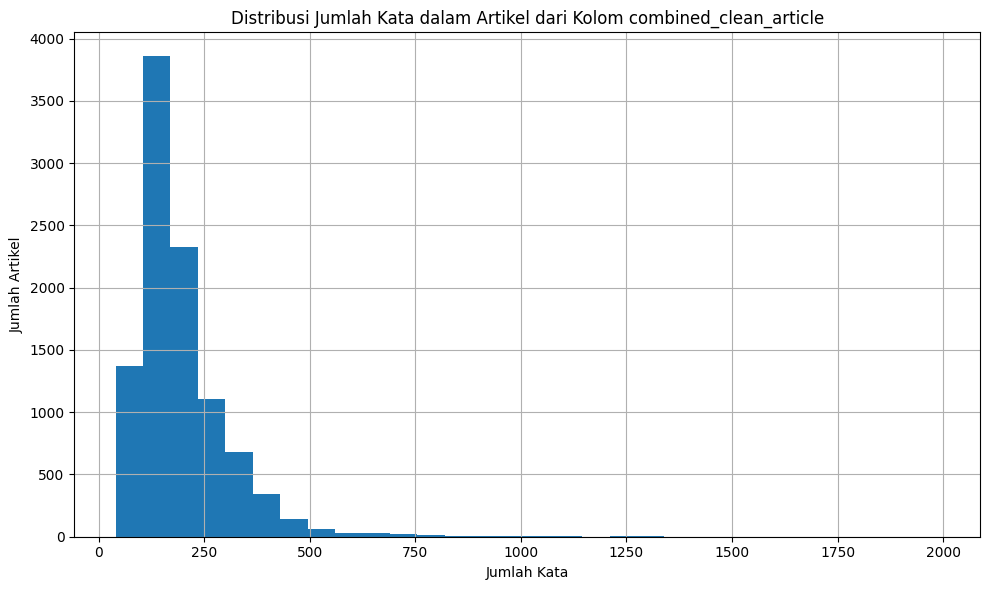

In [44]:
# Menghitung jumlah kata dalam setiap entri kolom 'combined_clean_article'
train_set['word_count'] = train_set['combined_clean_article'].apply(lambda x: len(x.split()))

# Membuat histogram untuk distribusi panjang kata
plt.figure(figsize=(10, 6))
plt.hist(train_set['word_count'], bins=30)
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.title('Distribusi Jumlah Kata dalam Artikel dari Kolom combined_clean_article')
plt.grid(True)
plt.tight_layout()
plt.show()

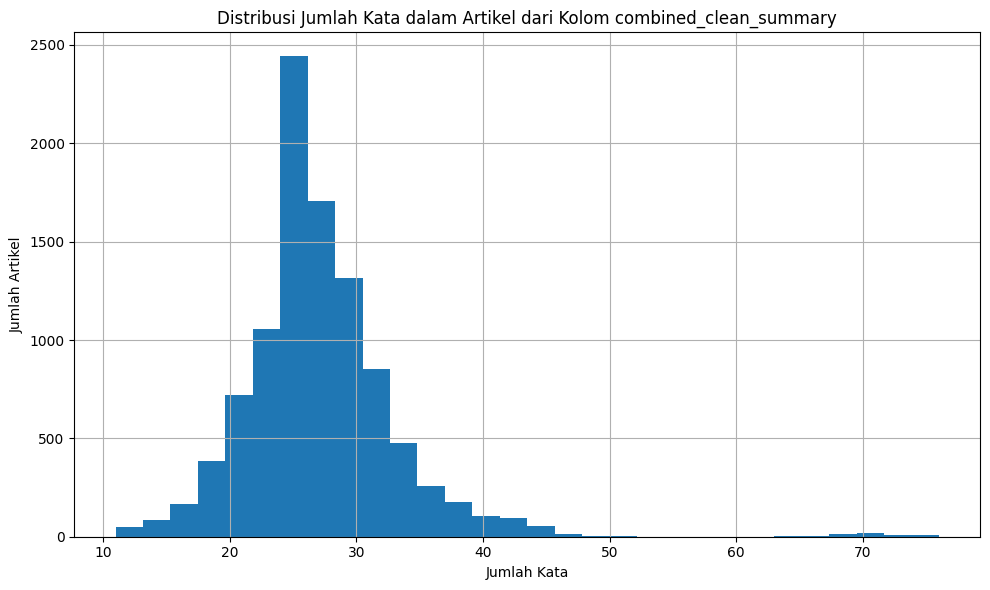

In [45]:
# Menghitung jumlah kata dalam setiap entri kolom 'combined_clean_article'
train_set['word_count'] = train_set['combined_clean_summary'].apply(lambda x: len(x.split()))

# Membuat histogram untuk distribusi panjang kata
plt.figure(figsize=(10, 6))
plt.hist(train_set['word_count'], bins=30)
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.title('Distribusi Jumlah Kata dalam Artikel dari Kolom combined_clean_summary')
plt.grid(True)
plt.tight_layout()
plt.show()

# Get top 10 most common words

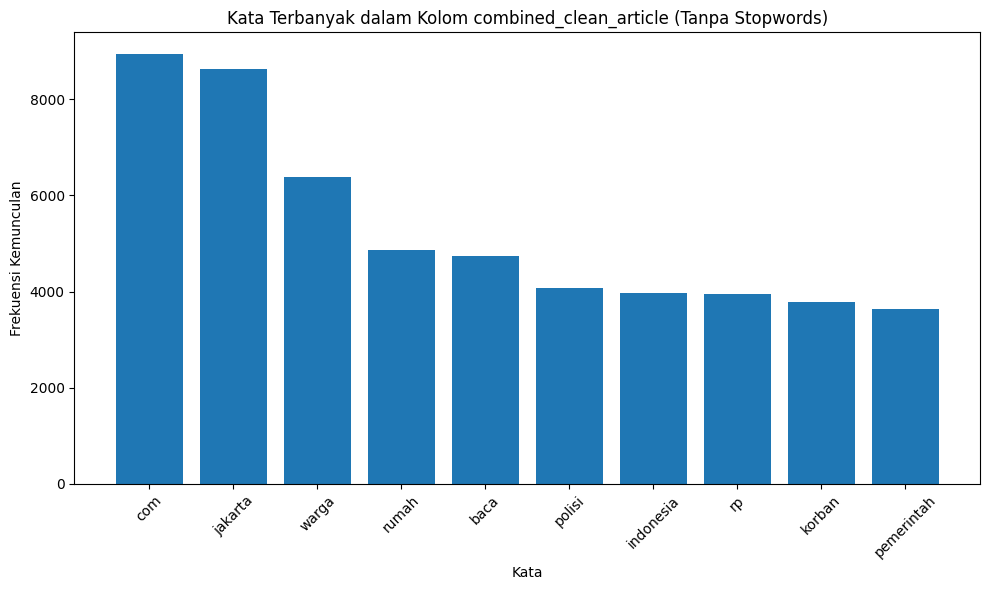

In [46]:
# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Tokenize and remove stopwords from all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Count word frequencies
word_counts = Counter(filtered_words)

# Get top 10 most common words
top_10_words = word_counts.most_common(10)

# Visualize top 10 words using a bar chart
plt.figure(figsize=(10, 6))
words, counts = zip(*top_10_words)
plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Kata Terbanyak dalam Kolom combined_clean_article (Tanpa Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

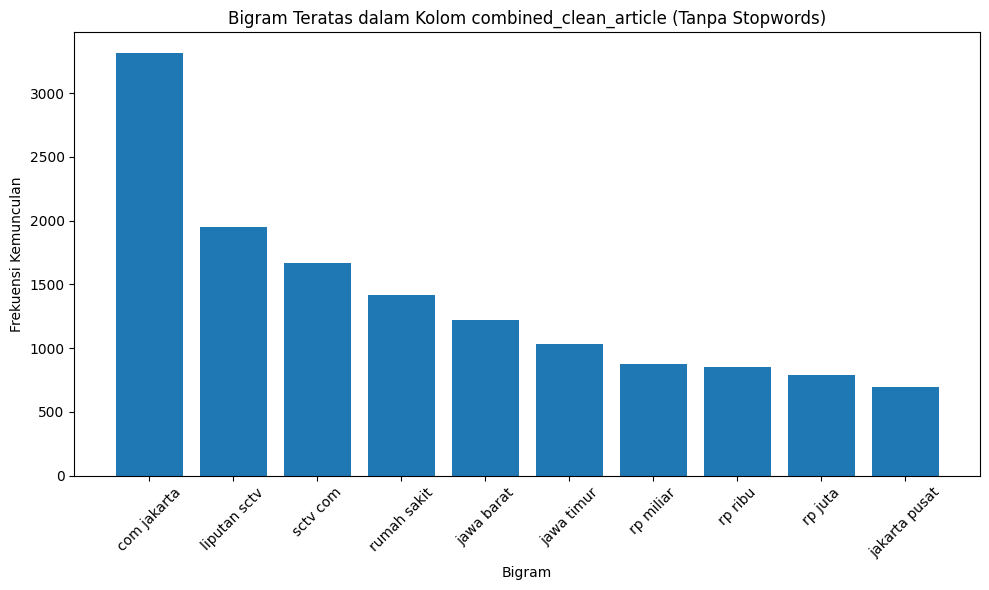

In [47]:
# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Tokenize and remove stopwords from all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Generate 2-grams (bigrams)
bigrams = list(ngrams(filtered_words, 2))

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get top 10 most common bigrams
top_10_bigrams = bigram_counts.most_common(10)

# Visualize top 10 bigrams using a bar chart
plt.figure(figsize=(10, 6))
bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
bigram_counts = [count for bigram, count in top_10_bigrams]
plt.bar(bigram_labels, bigram_counts)
plt.xlabel('Bigram')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Bigram Teratas dalam Kolom combined_clean_article (Tanpa Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

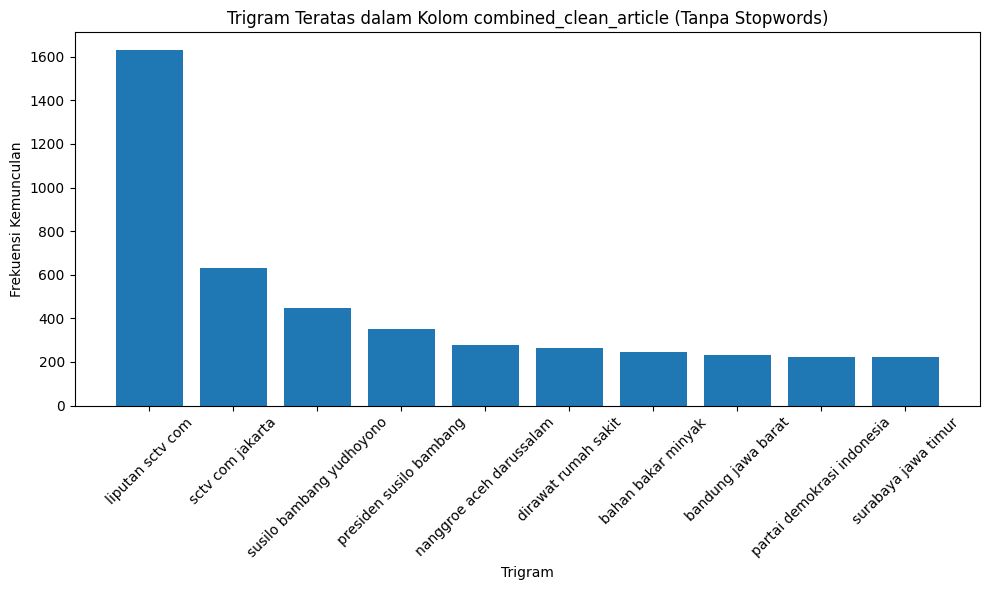

In [48]:
# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Tokenize and remove stopwords from all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Generate 3-grams (trigrams)
trigrams = list(ngrams(filtered_words, 3))

# Count trigram frequencies
trigram_counts = Counter(trigrams)

# Get top 10 most common trigrams
top_10_trigrams = trigram_counts.most_common(10)

# Visualize top 10 trigrams using a bar chart
plt.figure(figsize=(10, 6))
trigram_labels = [' '.join(trigram) for trigram, count in top_10_trigrams]
trigram_counts = [count for trigram, count in top_10_trigrams]
plt.bar(trigram_labels, trigram_counts)
plt.xlabel('Trigram')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Trigram Teratas dalam Kolom combined_clean_article (Tanpa Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## WordCloud

### WordCloud combined_clean_article

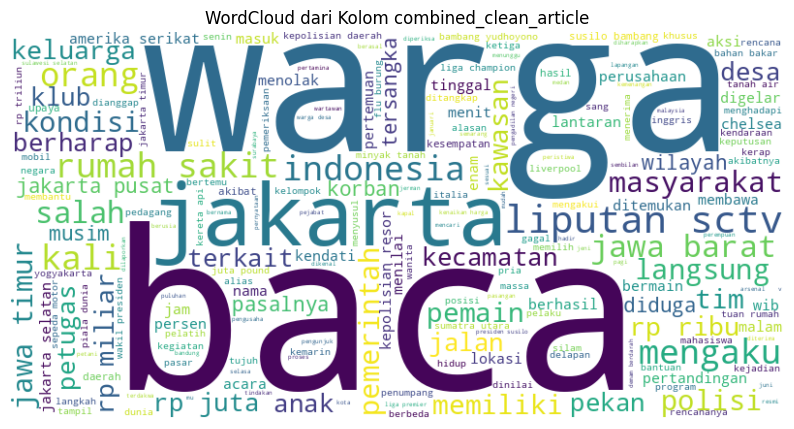

In [49]:
# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return ' '.join([word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalpha()])

# Apply function to remove stopwords and non-alphabetic characters
processed_text = remove_stopwords_and_non_alpha(all_texts)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom combined_clean_article')
plt.show()

### WordCloud combined_clean_summary

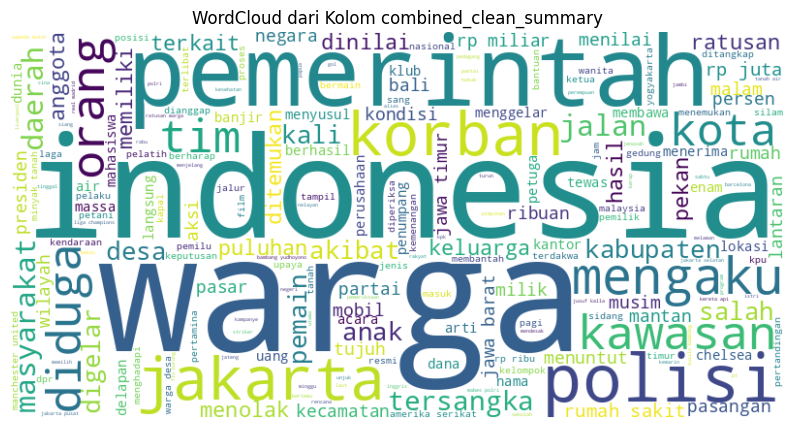

In [50]:
# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_summary'])

# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return ' '.join([word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalpha()])

# Apply function to remove stopwords and non-alphabetic characters
processed_text = remove_stopwords_and_non_alpha(all_texts)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom combined_clean_summary')
plt.show()

## Text Exploration

In [51]:
def extract_awal_berita(text):
    match = re.search(r'Liputan6\. com, [A-Za-z\s]+:', text)
    return match.group(0) if match else ''

In [52]:
train_set['ekstrak_awal_berita'] = train_set['combined_clean_article'].apply(extract_awal_berita)

In [53]:
train_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,"Liputan6. com, Minahasa Selatan:"
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,"Liputan6. com, Bandung:"
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,"Liputan6. com, Buru:"
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,"Liputan6. com, Jakarta:"
...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,"Liputan6. com, Jakarta:"
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,"Liputan6. com, Jakarta:"
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,"Liputan6. com, Singapura:"
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,"Liputan6. com, Jakarta:"


In [54]:
def extract_hari_tanggal(text):
    match = re.search(r'\w+\s*\(\d{1,2}/\d{1,2}\)', text)
    return match.group(0) if match else ''

In [55]:
train_set['ekstrak_hari_tanggal'] = train_set['combined_clean_article'].apply(extract_hari_tanggal)

In [56]:
train_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita,ekstrak_hari_tanggal
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,"Liputan6. com, Minahasa Selatan:",Senin (13/12)
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,"Liputan6. com, Bandung:",
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,,Minggu (25/02)
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,"Liputan6. com, Buru:",
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,"Liputan6. com, Jakarta:",Jumat (17/4)
...,...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,"Liputan6. com, Jakarta:",Kamis (7/7)
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,"Liputan6. com, Jakarta:",Jumat (9/1)
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,"Liputan6. com, Singapura:",Kamis (12/11)
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,"Liputan6. com, Jakarta:",


In [57]:
def extract_nama_penulis(text):
    match = re.search(r'\([A-Z]+/[A-Za-z\s]+(?: dan [A-Za-z\s]+)?\)\.', text)
    return match.group(0) if match else ''

In [58]:
train_set['ekstrak_nama_penulis'] = train_set['combined_clean_article'].apply(extract_nama_penulis)

In [59]:
train_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,"Liputan6. com, Minahasa Selatan:",Senin (13/12),(TNA/Aldrin Arief).
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,"Liputan6. com, Bandung:",,(KEN/Patria Hidayat).
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,,Minggu (25/02),
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,"Liputan6. com, Buru:",,(TES/YUS).
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,"Liputan6. com, Jakarta:",Jumat (17/4),
...,...,...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,"Liputan6. com, Jakarta:",Kamis (7/7),
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,"Liputan6. com, Jakarta:",Jumat (9/1),(KEN/Dian Wignyo dan Adi Iskarpandi).
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,"Liputan6. com, Singapura:",Kamis (12/11),(TES/YUS).
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,"Liputan6. com, Jakarta:",,(YYT/Amin Alkadrie dan Ririen Binti).


In [60]:
def extract_baca(text):
    match = re.search(r'\[baca: .*?\]', text)
    return match.group(0) if match else ''

In [61]:
train_set['ekstrak_baca'] = train_set['combined_clean_article'].apply(extract_baca)

In [62]:
train_set

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis,ekstrak_baca
0,91767,https://www.liputan6.com/news/read/91767/hujan...,"[[Liputan6, ., com, ,, Minahasa, Selatan, :, G...","[[Petugas, pemantau, gunung, sudah, menetapkan...","[1, 4]","Liputan6. com, Minahasa Selatan: Gunung Berapi...",Petugas pemantau gunung sudah menetapkan statu...,"di, mulai, sejak, Hingga, yang, dari, setinggi...",28,"Liputan6. com, Minahasa Selatan:",Senin (13/12),(TNA/Aldrin Arief).,[baca: Gunung Soputan Kembali Meletus]
1,55242,https://www.liputan6.com/news/read/55242/menda...,"[[Liputan6, ., com, ,, Bandung, :, Aliansi, An...","[[Aliansi, Antikorupsi, Jabar, menuding, Deni,...","[1, 3]","Liputan6. com, Bandung: Aliansi Antikorupsi Ja...",Aliansi Antikorupsi Jabar menuding Deni Setiaw...,"meminta, Dalam, Hari, tidak, dan, sebagai, dan...",24,"Liputan6. com, Bandung:",,(KEN/Patria Hidayat).,[baca: Kejati Jabar Didesak Mengusut Dana Kavl...
2,206174,https://www.liputan6.com/news/read/206174/terr...,"[[Final, Piala, Liga, atau, Carling, Cup, yang...","[[Chelsea, akhirnya, keluar, sebagai, juara, s...","[0, 2]",Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,"atau, yang, berlangsung, di, berbagai, Pada, y...",31,,Minggu (25/02),,
3,274948,https://www.liputan6.com/news/read/274948/iron...,"[[Liputan6, ., com, ,, Buru, :, Di, tengah, mo...","[[Ingar-bingar, pembangunan, tak, sampai, di, ...","[1, 6]","Liputan6. com, Buru: Di tengah modernisasi dan...",Ingar-bingar pembangunan tak sampai di Pulau B...,"Di, tengah, dan, masih, ada, bagian, ini, yang...",15,"Liputan6. com, Buru:",,(TES/YUS).,
4,176193,https://www.liputan6.com/news/read/176193/bank...,"[[Liputan6, ., com, ,, Jakarta, :, Bank, Indon...","[[Bank, IFI, dilikuidasi, Bank, Indonesia, mul...","[0, 1]","Liputan6. com, Jakarta: Bank Indonesia melikui...",Bank IFI dilikuidasi Bank Indonesia mulai hari...,"per, itu, karena, yang, Mulai, dari, hingga, y...",20,"Liputan6. com, Jakarta:",Jumat (17/4),,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,104888,https://www.liputan6.com/news/read/104888/janj...,"[[Liputan6, ., com, ,, Jakarta, :, Tias, Suban...","[[Antrean, panjang, tetap, terjadi, di, pom, b...","[3, 5, 9]","Liputan6. com, Jakarta: Tias Suban kecewa. War...",Antrean panjang tetap terjadi di pom bensin di...,"merasa, panjang, masih, terjadi, di, untuk, um...",33,"Liputan6. com, Jakarta:",Kamis (7/7),,[baca: Maaf Bensin Habis]
10006,69834,https://www.liputan6.com/news/read/69834/beddu...,"[[Liputan6, ., com, ,, Jakarta, :, Mantan, Kep...","[[Kuasa, hukum, Beddu, Amang, ,, Djoko, Prabow...","[3, 5]","Liputan6. com, Jakarta: Mantan Kepala Badan Ur...","Kuasa hukum Beddu Amang, Djoko Prabowo mengata...","tidak, Besar, karena, seharusnya, sebagai, kas...",26,"Liputan6. com, Jakarta:",Jumat (9/1),(KEN/Dian Wignyo dan Adi Iskarpandi).,[baca: Mantan Deputi Pengadaan Bulog Diperiksa]
10007,250820,https://www.liputan6.com/news/read/250820/pres...,"[[Liputan6, ., com, ,, Singapura, :, Presiden,...","[[Presiden, SBY, tiba, di, Singapura, untuk, m...","[0, 6]","Liputan6. com, Singapura: Presiden Susilo Bamb...",Presiden SBY tiba di Singapura untuk menjalani...,"tiba, di, untuk, tak, lama, setelah, akan, mel...",18,"Liputan6. com, Singapura:",Kamis (12/11),(TES/YUS).,
10008,131217,https://www.liputan6.com/news/read/131217/band...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, be...","[[Kendati, kabut, asap, muncul, kembali, ,, Ba...","[1, 2]","Liputan6. com, Jakarta: Setelah beberapa hari ...","Kendati kabut asap muncul kembali, Bandara Sup...","Setelah, beberapa, hari, karena, hari, ini, ke...",22,"Liputan6. com, Jakarta:",,(YYT/Amin Alkadrie dan Ririen Binti).,[baca: Bandara Supadio Kembali Dibuka]


## Data Preprocessing

In [63]:
def clean_article(text):
    # hapus awal berita
    text = re.sub(r'Liputan6\. com, [A-Za-z\s]+:', '', text)
    # hapus hari dan tanggal
    text = re.sub(r'\w+\s*\(\d{1,2}/\d{1,2}\)', '', text)
    # hapus nama penulis
    text = re.sub(r'\([A-Z]+/[A-Za-z\s]+(?: dan [A-Za-z\s]+)?\)\.', '', text)
    # hapus [baca: .......]
    text = re.sub(r'\[baca: .*?\]', '', text)
    return text.strip()

In [64]:
train_set['final_clean_article'] = train_set['combined_clean_article'].apply(clean_article)
valid_set['final_clean_article'] = valid_set['combined_clean_article'].apply(clean_article)
test_set['final_clean_article'] = test_set['combined_clean_article'].apply(clean_article)

In [65]:
final_train_set = train_set[['final_clean_article','combined_clean_summary']]
final_valid_set = valid_set[['final_clean_article','combined_clean_summary']]
final_test_set = test_set[['final_clean_article','combined_clean_summary']]

## Sanity Check

In [66]:
def extract_awal_berita(text):
    match = re.search(r'Liputan6\. com, [A-Za-z\s]+:', text)
    return match.group(0) if match else ''

In [67]:
final_train_set['ekstrak_awal_berita'] = final_train_set['final_clean_article'].apply(extract_awal_berita)

In [68]:
final_train_set

,final_clean_article,combined_clean_summary,ekstrak_awal_berita
0,"Gunung Berapi Soputan di Minahasa Selatan, Sul...",Petugas pemantau gunung sudah menetapkan statu...,
1,Aliansi Antikorupsi Jawa Barat meminta Menteri...,Aliansi Antikorupsi Jabar menuding Deni Setiaw...,
2,Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,
3,Di tengah modernisasi dan ingar-bingar pembang...,Ingar-bingar pembangunan tak sampai di Pulau B...,
4,Bank Indonesia melikuidasi Bank IFI per . Peri...,Bank IFI dilikuidasi Bank Indonesia mulai hari...,
...,...,...,...
10005,"Tias Suban kecewa. Warga Kupang, Nusatenggara ...",Antrean panjang tetap terjadi di pom bensin di...,
10006,Mantan Kepala Badan Urusan Logistik Beddu Aman...,"Kuasa hukum Beddu Amang, Djoko Prabowo mengata...",
10007,"Presiden Susilo Bambang Yudhoyono, sore, tiba...",Presiden SBY tiba di Singapura untuk menjalani...,
10008,Setelah beberapa hari menghilang karena turun ...,"Kendati kabut asap muncul kembali, Bandara Sup...",


In [69]:
train_set_with_awal_berita = final_train_set.loc[final_train_set['ekstrak_awal_berita'] != '']
train_set_with_awal_berita

,final_clean_article,combined_clean_summary,ekstrak_awal_berita


In [70]:
def extract_hari_tanggal(text):
    match = re.search(r'\w+\s*\(\d{1,2}/\d{1,2}\)', text)
    return match.group(0) if match else ''

In [71]:
final_train_set['ekstrak_hari_tanggal'] = final_train_set['final_clean_article'].apply(extract_hari_tanggal)

In [72]:
final_train_set

,final_clean_article,combined_clean_summary,ekstrak_awal_berita,ekstrak_hari_tanggal
0,"Gunung Berapi Soputan di Minahasa Selatan, Sul...",Petugas pemantau gunung sudah menetapkan statu...,,
1,Aliansi Antikorupsi Jawa Barat meminta Menteri...,Aliansi Antikorupsi Jabar menuding Deni Setiaw...,,
2,Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,,
3,Di tengah modernisasi dan ingar-bingar pembang...,Ingar-bingar pembangunan tak sampai di Pulau B...,,
4,Bank Indonesia melikuidasi Bank IFI per . Peri...,Bank IFI dilikuidasi Bank Indonesia mulai hari...,,
...,...,...,...,...
10005,"Tias Suban kecewa. Warga Kupang, Nusatenggara ...",Antrean panjang tetap terjadi di pom bensin di...,,
10006,Mantan Kepala Badan Urusan Logistik Beddu Aman...,"Kuasa hukum Beddu Amang, Djoko Prabowo mengata...",,
10007,"Presiden Susilo Bambang Yudhoyono, sore, tiba...",Presiden SBY tiba di Singapura untuk menjalani...,,
10008,Setelah beberapa hari menghilang karena turun ...,"Kendati kabut asap muncul kembali, Bandara Sup...",,


In [73]:
train_set_with_hari_tanggal = final_train_set.loc[final_train_set['ekstrak_hari_tanggal'] != '']
train_set_with_hari_tanggal

,final_clean_article,combined_clean_summary,ekstrak_awal_berita,ekstrak_hari_tanggal


In [74]:
def extract_nama_penulis(text):
    match = re.search(r'\([A-Z]+/[A-Za-z\s]+(?: dan [A-Za-z\s]+)?\)\.', text)
    return match.group(0) if match else ''

In [75]:
final_train_set['ekstrak_nama_penulis'] = final_train_set['final_clean_article'].apply(extract_nama_penulis)

In [76]:
final_train_set

,final_clean_article,combined_clean_summary,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis
0,"Gunung Berapi Soputan di Minahasa Selatan, Sul...",Petugas pemantau gunung sudah menetapkan statu...,,,
1,Aliansi Antikorupsi Jawa Barat meminta Menteri...,Aliansi Antikorupsi Jabar menuding Deni Setiaw...,,,
2,Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,,,
3,Di tengah modernisasi dan ingar-bingar pembang...,Ingar-bingar pembangunan tak sampai di Pulau B...,,,
4,Bank Indonesia melikuidasi Bank IFI per . Peri...,Bank IFI dilikuidasi Bank Indonesia mulai hari...,,,
...,...,...,...,...,...
10005,"Tias Suban kecewa. Warga Kupang, Nusatenggara ...",Antrean panjang tetap terjadi di pom bensin di...,,,
10006,Mantan Kepala Badan Urusan Logistik Beddu Aman...,"Kuasa hukum Beddu Amang, Djoko Prabowo mengata...",,,
10007,"Presiden Susilo Bambang Yudhoyono, sore, tiba...",Presiden SBY tiba di Singapura untuk menjalani...,,,
10008,Setelah beberapa hari menghilang karena turun ...,"Kendati kabut asap muncul kembali, Bandara Sup...",,,


In [77]:
train_set_with_nama_penulis = final_train_set.loc[final_train_set['ekstrak_nama_penulis'] != '']
train_set_with_nama_penulis

,final_clean_article,combined_clean_summary,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis


In [78]:
def extract_baca(text):
    match = re.search(r'\[baca: .*?\]', text)
    return match.group(0) if match else ''

In [79]:
final_train_set['ekstrak_baca'] = final_train_set['final_clean_article'].apply(extract_baca)

In [80]:
final_train_set

,final_clean_article,combined_clean_summary,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis,ekstrak_baca
0,"Gunung Berapi Soputan di Minahasa Selatan, Sul...",Petugas pemantau gunung sudah menetapkan statu...,,,,
1,Aliansi Antikorupsi Jawa Barat meminta Menteri...,Aliansi Antikorupsi Jabar menuding Deni Setiaw...,,,,
2,Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...,,,,
3,Di tengah modernisasi dan ingar-bingar pembang...,Ingar-bingar pembangunan tak sampai di Pulau B...,,,,
4,Bank Indonesia melikuidasi Bank IFI per . Peri...,Bank IFI dilikuidasi Bank Indonesia mulai hari...,,,,
...,...,...,...,...,...,...
10005,"Tias Suban kecewa. Warga Kupang, Nusatenggara ...",Antrean panjang tetap terjadi di pom bensin di...,,,,
10006,Mantan Kepala Badan Urusan Logistik Beddu Aman...,"Kuasa hukum Beddu Amang, Djoko Prabowo mengata...",,,,
10007,"Presiden Susilo Bambang Yudhoyono, sore, tiba...",Presiden SBY tiba di Singapura untuk menjalani...,,,,
10008,Setelah beberapa hari menghilang karena turun ...,"Kendati kabut asap muncul kembali, Bandara Sup...",,,,


In [81]:
train_set_with_baca = final_train_set.loc[final_train_set['ekstrak_baca'] != '']
train_set_with_baca

,final_clean_article,combined_clean_summary,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis,ekstrak_baca


In [82]:
final_train_set = final_train_set[['final_clean_article','combined_clean_summary']]
final_valid_set = final_valid_set[['final_clean_article','combined_clean_summary']]
final_test_set = final_test_set[['final_clean_article','combined_clean_summary']]

In [83]:
final_train_set

,final_clean_article,combined_clean_summary
0,"Gunung Berapi Soputan di Minahasa Selatan, Sul...",Petugas pemantau gunung sudah menetapkan statu...
1,Aliansi Antikorupsi Jawa Barat meminta Menteri...,Aliansi Antikorupsi Jabar menuding Deni Setiaw...
2,Final Piala Liga atau Carling Cup yang berlang...,Chelsea akhirnya keluar sebagai juara setelah ...
3,Di tengah modernisasi dan ingar-bingar pembang...,Ingar-bingar pembangunan tak sampai di Pulau B...
4,Bank Indonesia melikuidasi Bank IFI per . Peri...,Bank IFI dilikuidasi Bank Indonesia mulai hari...
...,...,...
10005,"Tias Suban kecewa. Warga Kupang, Nusatenggara ...",Antrean panjang tetap terjadi di pom bensin di...
10006,Mantan Kepala Badan Urusan Logistik Beddu Aman...,"Kuasa hukum Beddu Amang, Djoko Prabowo mengata..."
10007,"Presiden Susilo Bambang Yudhoyono, sore, tiba...",Presiden SBY tiba di Singapura untuk menjalani...
10008,Setelah beberapa hari menghilang karena turun ...,"Kendati kabut asap muncul kembali, Bandara Sup..."


In [84]:
final_valid_set

,final_clean_article,combined_clean_summary
0,Kasus penyerbuan pos penjagaan pasukan Brigade...,Polda Sulteng masih belum bisa memastikan peny...
1,Konflik berkepanjangan menyebabkan perkembanga...,Konflik berkepanjangan di Aceh menyebabkan ind...
2,Dana Moneter Internasional atau IMF melarang p...,IMF mendesak pemerintah Indonesia untuk melara...
3,Ribuan pegawai negeri sipil bekas kantor wilay...,Ribuan PNS bekas kanwil instansi yang dibubark...
4,Polri belum berencana menindaklanjuti kasus pe...,Polri belum mau menyelidiki kasus penggunaan d...
...,...,...
10977,Status Gubernur Bank Indonesia nonaktif Syahri...,Status Syahril dialihkan menjadi tahanan rumah...
10978,Pelaku sejarah Serangan Umum 1 Maret 1949 Prof...,Memperdebatkan sosok yang memberikan komando u...
10979,Polisi kembali mengungkap sebuah kasus penipua...,Seorang wanita muda yang tengah hamil lima bul...
10980,"Liputan6. Com, Jakarta: Usai memperingati 40 h...",Massa Front Hizbullah turun ke jalan. Mereka m...


In [85]:
final_test_set

,final_clean_article,combined_clean_summary
0,Menteri Koordinator Kesejahteraan Rakyat Jusuf...,Perlucutan senjata dan rehabilitasi pascakonfl...
1,"Sesuai harapan semua kalangan, dua kelompok ag...","Dua kubu agama yang bertikai di Poso, Sulteng,..."
2,Wajah Akbar Tandjung boleh saja setenang air. ...,Dana nonbujeter Bulog untuk rakyat miskin didu...
3,"Ketua Yayasan Raudatul Jannah Dadang Sukandar,...",Kejaksaan Agung kembali memeriksa Ketua Yayasa...
4,Kesemrawutan penanganan angkutan laut dari tah...,PT Pelni mengaku kewalahan melayani seluruh ca...
...,...,...
10967,"Menteri Koordinator Politik, Sosial, dan Keama...","Menko Polsoskam, Menteri Pertahanan, dan Menda..."
10968,Permintaan manusia supaya tetap sehat dan muda...,Terapi hydro pada usus besar dan terapi ozon p...
10969,Partai Kebangkitan Bangsa tidak akan ikut-ikut...,PKB tidak akan ikut-ikutan merekomendasikan pe...
10970,"Jalur kereta api jurusan Jakarta, Pemalang, Te...",Rel kereta api yang melintasi Sungai Cola Desa...


## Save Data

In [ ]:
final_test_set.to_csv('/content/drive/MyDrive/NLP Indonesia AI/Project - 2/data_clean/final_test_set.csv', index=False)
final_valid_set.to_csv('/content/drive/MyDrive/NLP Indonesia AI/Project - 2/data_clean/final_valid_set.csv', index=False)
final_train_set.to_csv('/content/drive/MyDrive/NLP Indonesia AI/Project - 2/data_clean/final_train_set.csv', index=False)